# voting classifier Regression

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability
of chosen class as the output. It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest
majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by
these models and predicts output based on their combined majority of voting for each output class.

# Voting Classifier supports two types of votings.

# Hard Voting:
In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of
the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
# Soft Voting:
In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction
probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it
had the highest probability averaged by each classifier.


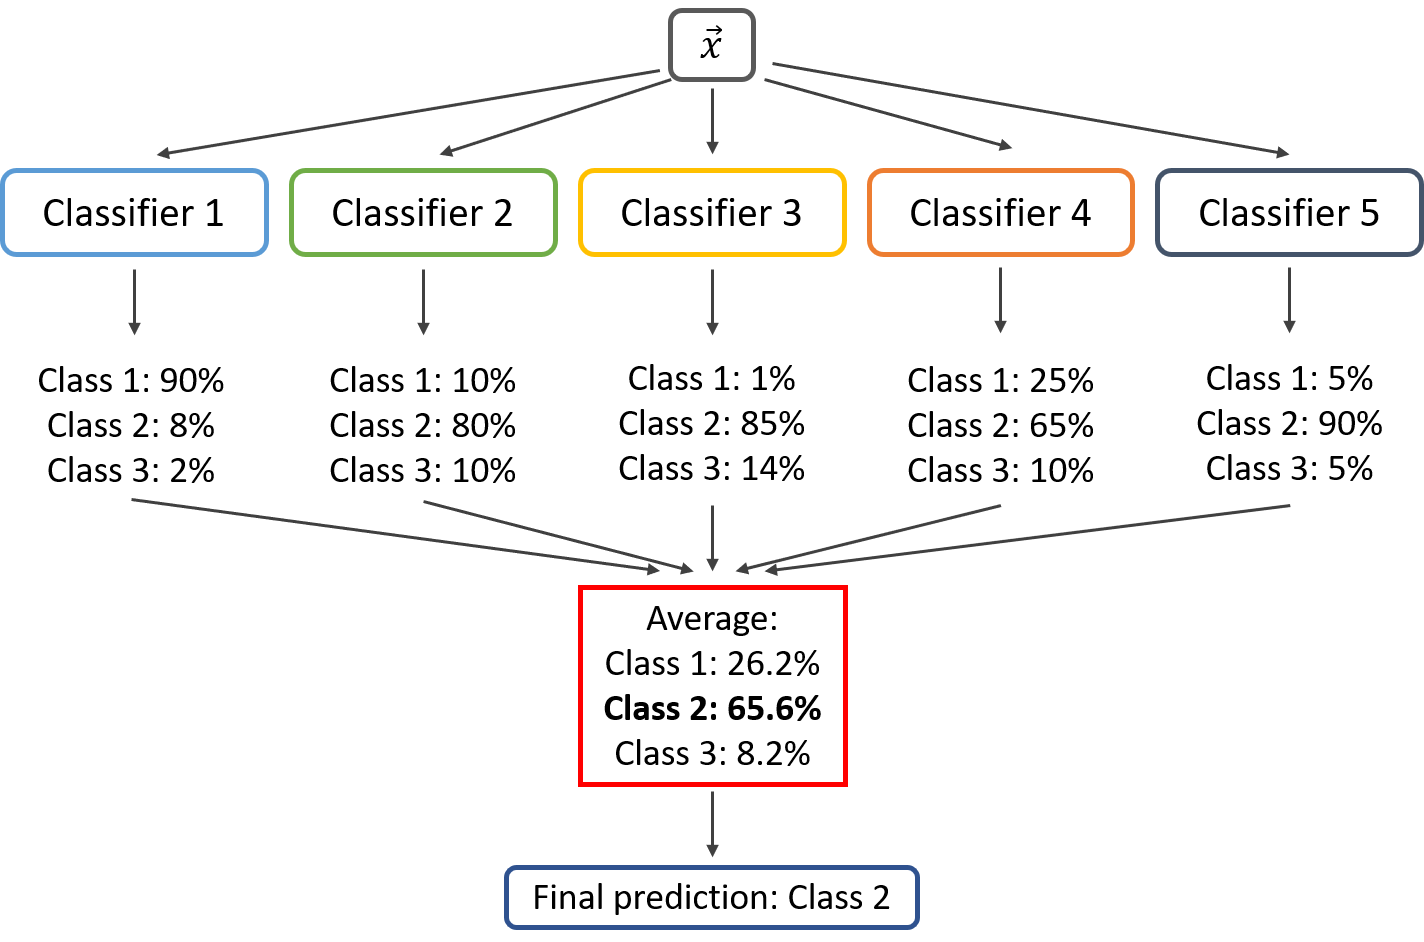

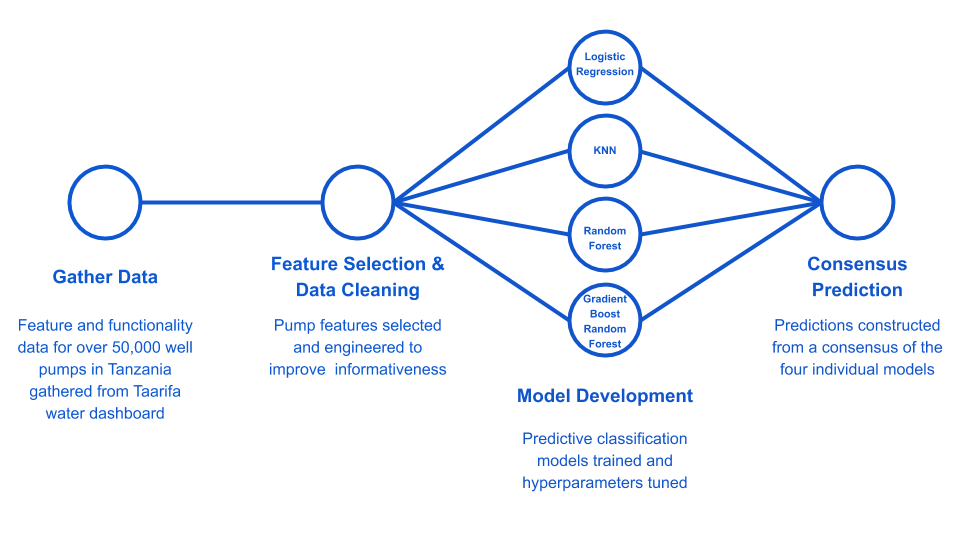

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn import datasets

from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'boosting.ipynb',
 'Decision_Tree_Regression.ipynb',
 'KNN_regression.ipynb',
 'Linear_regression.ipynb',
 'Logistic_Regression.ipynb',
 'Random_Forest_Regression.ipynb',
 'SVM_regression.ipynb',
 'SVR (Algorithm) support vector regressor.ipynb',
 'Voting_Classifier_regression.ipynb']

In [3]:
from sklearn.datasets import load_wine
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
df=pd.DataFrame(data.data)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [8]:
df.shape

(178, 13)

In [10]:
features = data['data']
labels = data['target']
features,labels

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [11]:
features.shape,labels.shape


((178, 13), (178,))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test


(array([[1.434e+01, 1.680e+00, 2.700e+00, ..., 5.700e-01, 1.960e+00,
         6.600e+02],
        [1.253e+01, 5.510e+00, 2.640e+00, ..., 8.200e-01, 1.690e+00,
         5.150e+02],
        [1.237e+01, 1.070e+00, 2.100e+00, ..., 1.040e+00, 2.770e+00,
         6.600e+02],
        ...,
        [1.438e+01, 1.870e+00, 2.380e+00, ..., 1.200e+00, 3.000e+00,
         1.547e+03],
        [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
         4.950e+02],
        [1.234e+01, 2.450e+00, 2.460e+00, ..., 8.000e-01, 3.380e+00,
         4.380e+02]]),
 array([[1.364000e+01, 3.100000e+00, 2.560000e+00, 1.520000e+01,
         1.160000e+02, 2.700000e+00, 3.030000e+00, 1.700000e-01,
         1.660000e+00, 5.100000e+00, 9.600000e-01, 3.360000e+00,
         8.450000e+02],
        [1.421000e+01, 4.040000e+00, 2.440000e+00, 1.890000e+01,
         1.110000e+02, 2.850000e+00, 2.650000e+00, 3.000000e-01,
         1.250000e+00, 5.240000e+00, 8.700000e-01, 3.330000e+00,
         1.080000e+03],
       

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((142, 13), (36, 13), (142,), (36,))

In [14]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [16]:
svc = SVC(probability=True)
lg = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc,lg,rf,knn


(SVC(probability=True),
 LogisticRegression(),
 RandomForestClassifier(),
 KNeighborsClassifier())

In [17]:
vt = VotingClassifier(estimators = [("svc", svc), ("rf", rf), ("lg", lg), ("knn", knn)],
 voting="soft",
 weights=[0.23, 0.43, 0.54, 0.56])
vt

VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('rf', RandomForestClassifier()),
                             ('lg', LogisticRegression()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft', weights=[0.23, 0.43, 0.54, 0.56])

In [18]:
vt.fit(X_train, y_train)


VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('rf', RandomForestClassifier()),
                             ('lg', LogisticRegression()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft', weights=[0.23, 0.43, 0.54, 0.56])

In [19]:
vt1 = VotingClassifier(estimators = [("svc", svc), ("rf", rf), ("lg", lg), ("knn", knn)], voting="hard")
vt1

VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('rf', RandomForestClassifier()),
                             ('lg', LogisticRegression()),
                             ('knn', KNeighborsClassifier())])

In [20]:
vt1.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('rf', RandomForestClassifier()),
                             ('lg', LogisticRegression()),
                             ('knn', KNeighborsClassifier())])

In [21]:
y_pred = vt.predict(X_test)
y_pred 

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

# confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

# acuracy

In [23]:
print('soft score voting:', vt.score(X_test,y_test))


soft score voting: 1.0


In [24]:
print('hard score voting:', vt1.score(X_test,y_test))


hard score voting: 0.9444444444444444


# classification_report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

